
# EDA - Used Car Resale Price 


This notebook introduces the pandas library for data loading and prepartation and explores techniques of Exploratory Data Analysis (EDA).

## Dataset

**Filename**: used_cars_maruti.csv

It is a comma separated file and there are 11 columns in the dataset.

1. Model - Model of the car
2. Location - The location in which the car was sold.
3. Age - Age of the car when the car was sold from the year of purchase.
4. KM_Driven - The total kilometers are driven in the car by the previous owner(s) in '000 kms.
5. Fuel_Type - The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
6. Transmission - The type of transmission used by the car. (Automatic / Manual)
7. Owner_Type - First, Second, Third, or Fourth & Above
8. Mileage - The standard mileage offered by the car company in kmpl or km/kg
9. Power - The maximum power of the engine in bhp.
10. Seats - The number of seats in the car.
11. Price - The resale price of the car (target).

## 1. Loading the dataset

In [ ]:
import pandas as pd
import numpy as np

### Check Library Versions

In [ ]:
pd.__version__

'1.5.3'

In [ ]:
np.__version__

'1.24.2'

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
cars_df = pd.read_csv('/content/drive/MyDrive/ML Course/MLCourseV1-main/Session_4/used_cars_maruti.csv')

### Showing few records

In [24]:
cars_df.head()

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,Age,Model,Mileage,Power,KM_Driven
0,Chennai,Diesel,Manual,First,7,6.00,8,ertiga,20.77,88.76,87
1,Jaipur,Diesel,Manual,First,5,5.60,5,swift,25.20,74.00,64
2,Jaipur,Diesel,Manual,First,5,5.99,3,swift,28.40,74.00,25
3,Hyderabad,Petrol,Manual,Second,5,2.75,7,alto,20.92,67.10,54
4,Jaipur,Petrol,Manual,Second,5,1.85,11,wagon,14.00,64.00,83


## Getting metadata

In [25]:
cars_df.shape

(1070, 11)

In [26]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Location      1070 non-null   object 
 1   Fuel_Type     1070 non-null   object 
 2   Transmission  1070 non-null   object 
 3   Owner_Type    1070 non-null   object 
 4   Seats         1070 non-null   int64  
 5   Price         1070 non-null   float64
 6   Age           1070 non-null   int64  
 7   Model         1070 non-null   object 
 8   Mileage       1070 non-null   float64
 9   Power         1070 non-null   float64
 10  KM_Driven     1070 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 92.1+ KB


## 2. Indexing and Slicing

Selecting specific set of rows and columns: How to slice, dice, and generally get and set subsets of pandas objects. 

Detailed Tutorial: https://pandas.pydata.org/pandas-docs/dev/user_guide/indexing.html

In [27]:
cars_df[-5:]

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,Age,Model,Mileage,Power,KM_Driven
1065,Bangalore,Petrol,Manual,First,5,4.00,5,celerio,23.1,67.04,67
1066,Pune,Diesel,Manual,First,5,7.43,4,vitara,24.3,88.50,37
1067,Delhi,Diesel,Manual,First,5,2.75,9,swift,19.3,73.90,68
1068,Delhi,Diesel,Manual,First,5,4.75,6,swift,28.4,74.00,27
1069,Kolkata,Petrol,Manual,First,5,2.65,7,wagon,18.9,67.10,46


In [61]:
cars_df.KM_Driven.max()

168

In [28]:
cars_df['Model'][0:5]

0    ertiga
1     swift
2     swift
3      alto
4     wagon
Name: Model, dtype: object

## 3. Sampling Records

In [29]:
cars_df[['Model','Price']][0:5]

,Model,Price
0,ertiga,6.00
1,swift,5.60
2,swift,5.99
3,alto,2.75
4,wagon,1.85


In [30]:
cars_df.sample(5)

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,Age,Model,Mileage,Power,KM_Driven
517,Delhi,Petrol,Manual,First,5,5.50,5,swift,17.5,85.8,58
571,Mumbai,Petrol,Manual,First,5,1.46,11,zen,19.0,67.1,47
501,Pune,Petrol,Manual,First,7,2.25,9,eeco,15.1,73.0,45
419,Kochi,Diesel,Manual,First,5,5.22,4,swift,28.4,74.0,62
287,Pune,Petrol,Manual,First,5,5.45,4,swift,22.0,81.8,27


# Univariate Analysis - Analyzing One Variable

## 4. Transmission Types

- What are different transmission types and how many cars are available from each transmission type (in percentages)?

In [31]:
cars_df.Transmission.value_counts()

Manual       976
Automatic     94
Name: Transmission, dtype: int64

In [32]:
cars_df.Transmission.value_counts(normalize=True)*100

Manual       91.214953
Automatic     8.785047
Name: Transmission, dtype: float64

### Ex1. Participants Exercises:

- What are different owner types?
- What percentage of cars are available from each owner type for resale?

In [40]:
#TODO by participants
cars_df.Owner_Type.value_counts(normalize = True)*100

First             86.074766
Second            12.056075
Third              1.775701
Fourth & Above     0.093458
Name: Owner_Type, dtype: float64

## 5. Filtering Records

- Find out how many cars were sold that were 15 years old or more?

In [43]:
old_cars_df = cars_df[cars_df.Age >=15 ]
old_cars_df.shape

(34, 11)

In [44]:
cars_df = cars_df[cars_df.Age <15 ]
cars_df.shape

(1036, 11)

## 6. Most and Least Expensive Cars

In [45]:
cars_df.head()

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,Age,Model,Mileage,Power,KM_Driven
0,Chennai,Diesel,Manual,First,7,6.00,8,ertiga,20.77,88.76,87
1,Jaipur,Diesel,Manual,First,5,5.60,5,swift,25.20,74.00,64
2,Jaipur,Diesel,Manual,First,5,5.99,3,swift,28.40,74.00,25
3,Hyderabad,Petrol,Manual,Second,5,2.75,7,alto,20.92,67.10,54
4,Jaipur,Petrol,Manual,Second,5,1.85,11,wagon,14.00,64.00,83


In [46]:
cars_df.sort_values('Price', ascending=False)[0:5]

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,Age,Model,Mileage,Power,KM_Driven
873,Kochi,Diesel,Manual,First,5,10.19,2,vitara,24.30,88.5,57
629,Coimbatore,Diesel,Manual,First,5,10.15,2,vitara,24.30,88.5,52
343,Kochi,Petrol,Manual,First,5,9.96,2,ciaz,20.73,91.1,15
1051,Hyderabad,Petrol,Automatic,First,5,9.95,3,ciaz,19.12,91.1,15
24,Kochi,Petrol,Manual,First,5,9.90,2,ciaz,20.73,91.1,41


### Ex2. Participants Exercises:

- Find out top 10 least expensive cars sold in Bangalore and print only their names and sold price 

    - Apply filter
    - Sort values 
    - Slice by column names
    - Print only top 10 rows


In [47]:
ban_cars_df = cars_df[cars_df.Location == 'Bangalore']

In [52]:
ban_cars_df.sort_values('Price', ascending=True)[['Price','Model']][0:10]
#ban_cars_df.sort_values('Price', ascending=True)[0:10]

,Price,Model
161,1.65,zen
837,2.39,alto
131,2.45,wagon
104,2.75,alto
475,2.75,alto
884,2.85,swift
63,2.90,alto
882,3.00,swift
861,3.10,swift
655,3.65,ritz


## 7. Distribution of Resale Price

- A distribution in statistics is a function that shows the possible values for a variable and how often they occur.
- How many cars are sold at different price ranges? For example: cars sold in the price range of 1L - 2L, 2L - 3L etc.?

#### Histogram for plotting Continuous Variables (Price)

In [53]:
import matplotlib.pyplot as plt
import seaborn as sn

sn.set_style("whitegrid")
sn.set_context("paper")
sn.color_palette("Set2");

Text(0.5, 1.0, 'Histogram of Resale Price')

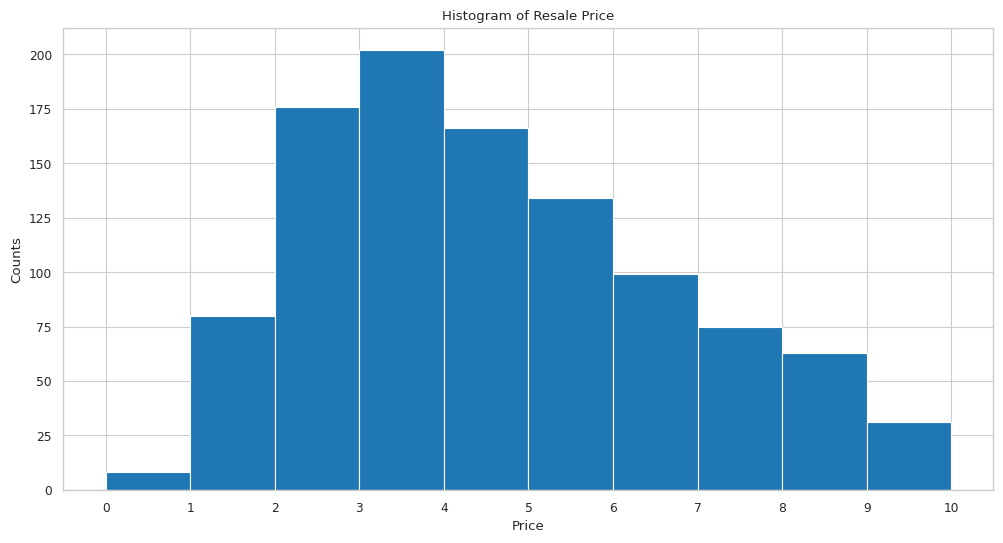

In [60]:
plt.figure(figsize=(12,6))
plt.hist(cars_df.Price, bins = list (range (0,11,1)))
plt.xticks(list(range(0,11,1)))
plt.xlabel("Price")
plt.ylabel("Counts")
plt.title("Histogram of Resale Price")

### Ex3. Participants Exercises:

- Draw a histogram for kilometer driven with each bin of size 10000km

Text(0.5, 1.0, 'Histogram of KM Driven')

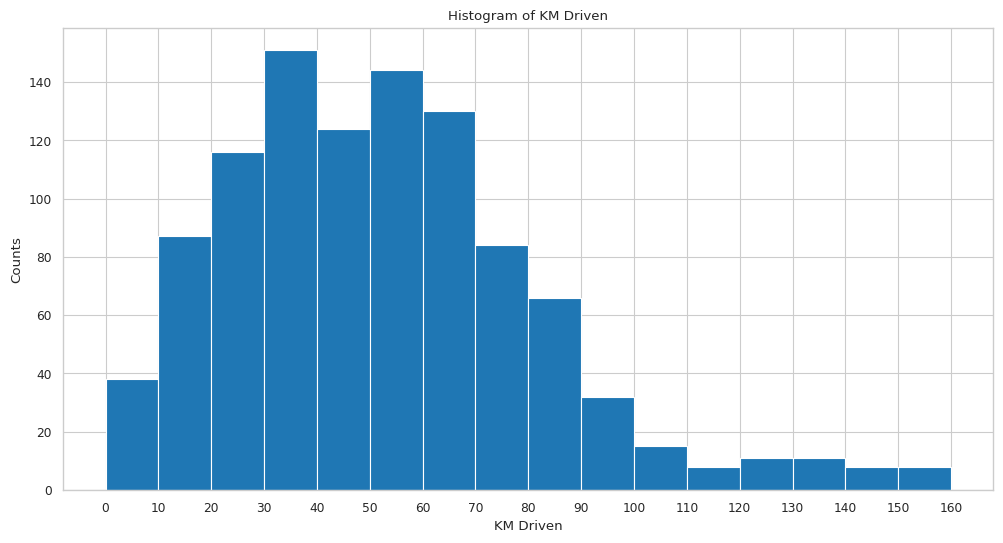

In [62]:
plt.figure(figsize=(12,6))
plt.hist(cars_df.KM_Driven, bins = list (range (0,170,10)))
plt.xticks(list(range(0,170,10)))
plt.xlabel("KM Driven")
plt.ylabel("Counts")
plt.title("Histogram of KM Driven")

## 8. Outliers

- In statistics, an outlier is a data point that differs significantly from other observations.
- An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set.
- An outlier can cause serious problems in statistical analyses.

Source: https://en.wikipedia.org/wiki/Outlier

### 8.1 Using Standard Deviation Approach

In [63]:
from scipy import stats

In [64]:
stats.norm.interval(0.997,
                    cars_df.Price.mean(),
                    cars_df.Price.std())

(-1.7769686598390138, 11.06111923898957)

### 8.2 Using Box Plot Approach

<Axes: >

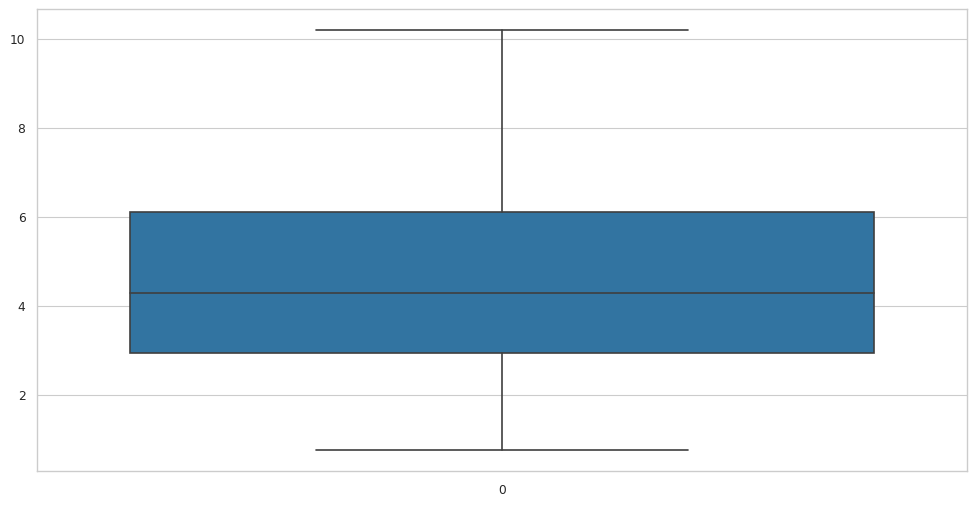

In [67]:
plt.figure(figsize=(12,6))
sn.boxplot(cars_df.Price)

In [70]:
cars_df.median()

<ipython-input-70-947ba78bc629>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cars_df.median()


Seats         5.000
Price         4.295
Age           6.000
Mileage      21.400
Power        74.000
KM_Driven    50.000
dtype: float64

In [76]:
iqr = stats.iqr(cars_df.Price)

In [77]:
price_stats = cars_df.Price.describe()
price_stats

count    1036.000000
mean        4.642075
std         2.162942
min         0.750000
25%         2.950000
50%         4.295000
75%         6.100000
max        10.190000
Name: Price, dtype: float64

In [79]:
min_price = price_stats['25%'] - 1.5 * iqr
min_price

-1.7749999999999995

In [80]:
max_price = price_stats['75%'] + 1.5 * iqr
max_price

10.825

<Axes: xlabel='Price', ylabel='Density'>

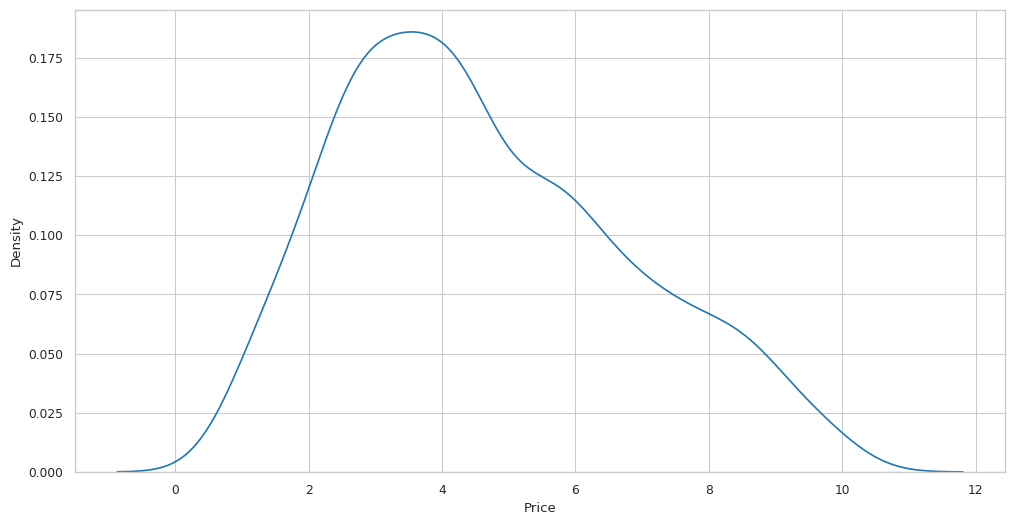

In [90]:
plt.figure(figsize=(12,6))
sn.kdeplot(cars_df, x= 'Price')

### Ex4. Participants Exercise:

- Find any outliers in terms of kilometer driven using both standard deviation and box plot approach?

In [82]:
stats.norm.interval(0.997,
                    cars_df.KM_Driven.mean(),
                    cars_df.KM_Driven.std())


array([ True,  True])

In [83]:
cars_df.KM_Driven.max()

168

<Axes: >

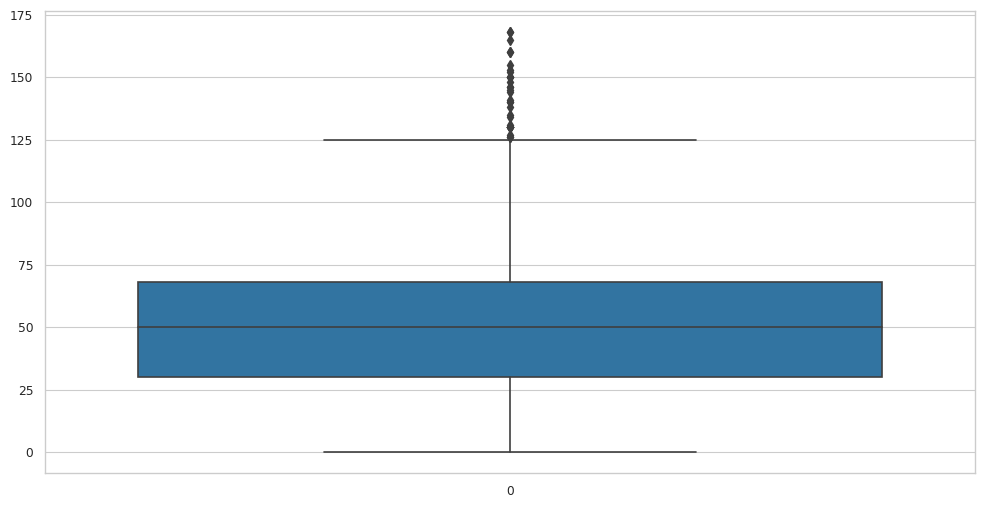

In [84]:
plt.figure(figsize=(12,6))
sn.boxplot(cars_df.KM_Driven)

In [86]:
iqr = stats.iqr(cars_df.KM_Driven)
price_stats = cars_df.KM_Driven.describe()
price_stats

count    1036.000000
mean       52.106178
std        29.851845
min         0.000000
25%        30.000000
50%        50.000000
75%        68.000000
max       168.000000
Name: KM_Driven, dtype: float64

In [88]:
min_KM_Driven = price_stats['25%'] - 1.5 * iqr
min_KM_Driven

-27.0

In [89]:
max_KM_Driven = price_stats['75%'] + 1.5 * iqr
max_KM_Driven

125.0

<Axes: xlabel='KM_Driven', ylabel='Density'>

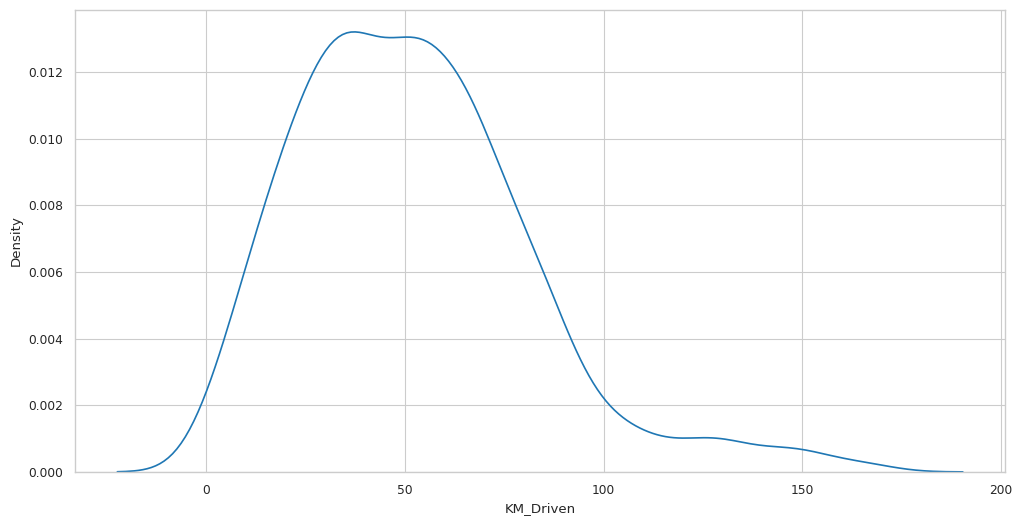

In [91]:
plt.figure(figsize=(12,6))
sn.kdeplot(cars_df, x= 'KM_Driven')

## 9. Cars Models and their distribution

We are assuming the first token to be the make and the second token to be the model.

In [92]:
cars_df.head()

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,Age,Model,Mileage,Power,KM_Driven
0,Chennai,Diesel,Manual,First,7,6.00,8,ertiga,20.77,88.76,87
1,Jaipur,Diesel,Manual,First,5,5.60,5,swift,25.20,74.00,64
2,Jaipur,Diesel,Manual,First,5,5.99,3,swift,28.40,74.00,25
3,Hyderabad,Petrol,Manual,Second,5,2.75,7,alto,20.92,67.10,54
4,Jaipur,Petrol,Manual,Second,5,1.85,11,wagon,14.00,64.00,83


In [93]:
cars_df.Model.value_counts()

swift      326
alto       130
wagon      115
ertiga      70
ciaz        66
ritz        64
baleno      60
celerio     56
vitara      35
dzire       24
omni        19
a-star      17
zen         16
eeco        12
sx4          9
800          7
ignis        6
s-cross      3
esteem       1
Name: Model, dtype: int64

In [94]:
cars_df.describe()

,Seats,Price,Age,Mileage,Power,KM_Driven
count,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000
mean,5.165058,4.642075,6.106178,21.729575,73.819566,52.106178
std,0.583820,2.162942,2.982124,3.330187,13.488611,29.851845
min,4.000000,0.750000,1.000000,14.000000,34.200000,0.000000
25%,5.000000,2.950000,4.000000,19.120000,67.100000,30.000000
50%,5.000000,4.295000,6.000000,21.400000,74.000000,50.000000
75%,5.000000,6.100000,8.000000,24.070000,85.800000,68.000000
max,8.000000,10.190000,14.000000,28.400000,100.000000,168.000000


## 10. Top 10 selling models

In [97]:
models_df = cars_df.Model.value_counts().reset_index();
models_df.columns = ['Model', 'Counts']
models_df.head(10)

,Model,Counts
0,swift,326
1,alto,130
2,wagon,115
3,ertiga,70
4,ciaz,66
5,ritz,64
6,baleno,60
7,celerio,56
8,vitara,35
9,dzire,24


<Axes: xlabel='Model', ylabel='Counts'>

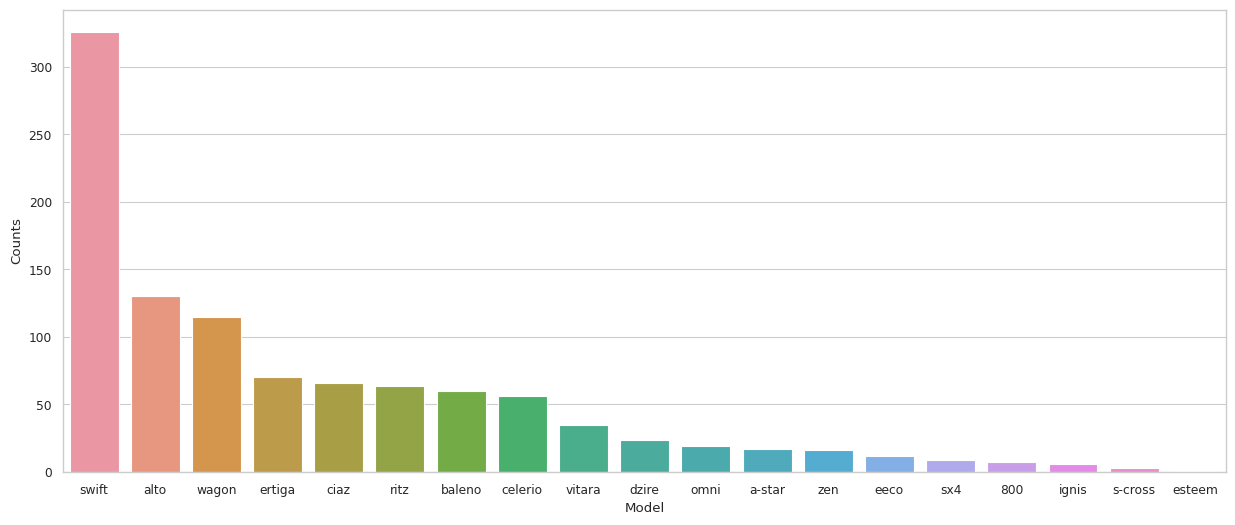

In [105]:
plt.figure(figsize = (15,6))
sn.barplot( data = models_df,
           x = 'Model',
           y = 'Counts')

In [99]:
top10_models = list(models_df.Model) [0:10]

In [100]:
top10_models

['swift',
 'alto',
 'wagon',
 'ertiga',
 'ciaz',
 'ritz',
 'baleno',
 'celerio',
 'vitara',
 'dzire']

## 11. Models to Remove

In [101]:
models_to_remove = models_df[models_df.Counts <10]['Model']

In [102]:
models_to_remove

14        sx4
15        800
16      ignis
17    s-cross
18     esteem
Name: Model, dtype: object

### Ex6. Participants Exercise

- Plot the number of cars sold for each of years of car edition (Year) using count plot.

# Bivariate Analysis - Analyzing Two Variables

## 12. Average selling prices of top 10 models

In [107]:
avg_price_models = cars_df.groupby('Model')['Price'].mean()
avg_price_models

Model
800        0.935714
a-star     2.365294
alto       2.563385
baleno     6.949500
celerio    4.118393
ciaz       7.549545
dzire      6.249167
eeco       3.475000
ertiga     6.920857
esteem     1.450000
ignis      6.148333
omni       2.432105
ritz       3.611250
s-cross    7.950000
swift      4.745215
sx4        5.547778
vitara     8.713429
wagon      2.945043
zen        1.696250
Name: Price, dtype: float64

## 13. Distribution of Resale Price For Top 10 Models

- What is distribution of sales price of cars of top 10 models, which are 2 years old?

<Axes: xlabel='Model', ylabel='Price'>

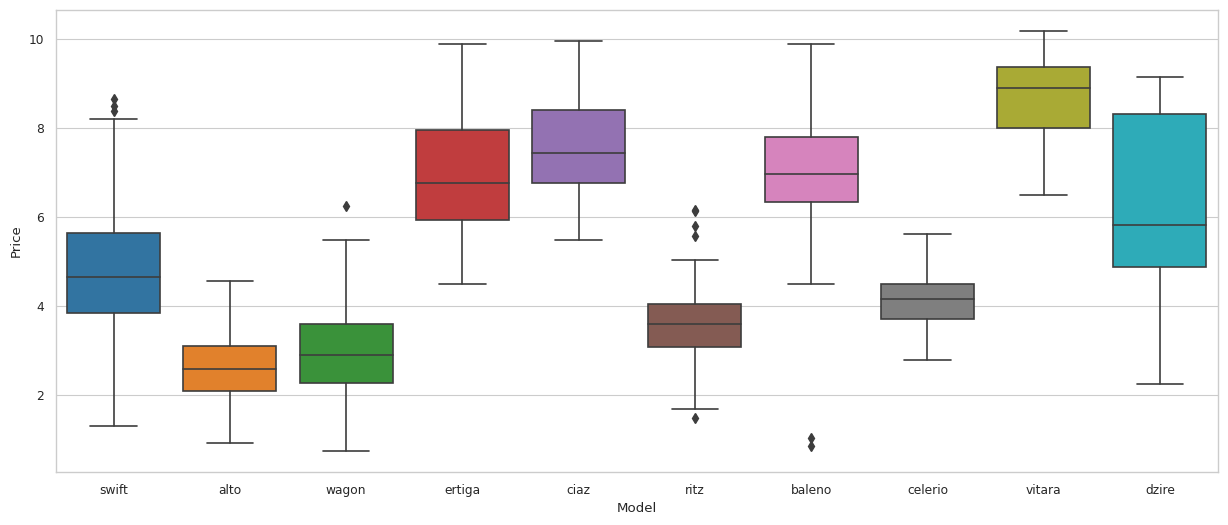

In [112]:
plt.figure(figsize = (15,6))
sn.boxplot( data = cars_df[cars_df.Model.isin(top10_models)],
           x = 'Model',
           y = 'Price',
           order = top10_models)

### Ex7. Participant Exercise:

- Find out the variations of sales prices for only SWIFT model for different ages (e.g. one year old, two year old and so on?

In [113]:
swift_cars_df = cars_df[cars_df.Model == 'swift']

<Axes: xlabel='Age', ylabel='Price'>

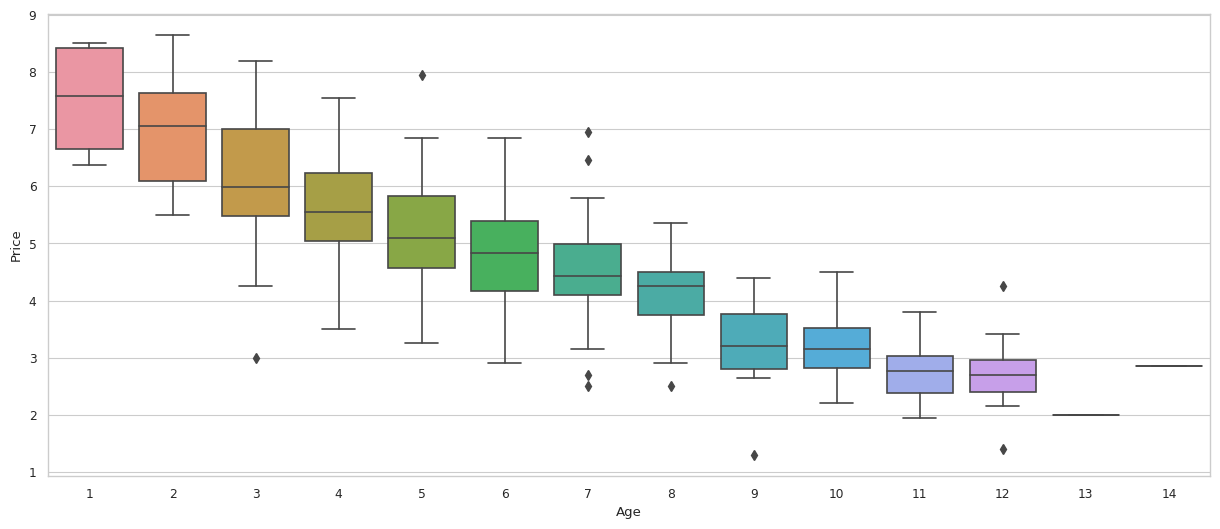

In [116]:
plt.figure(figsize = (15,6))
sn.boxplot( data = swift_cars_df,
           x = 'Age',
           y = 'Price')

## 14. Demand for models across different locations

In [138]:
top10_cars_df = cars_df[cars_df.Model.isin(top10_models)]
models_by_locations = pd.crosstab(top10_cars_df.Location,
                                  cars_df.Model,
                                  normalize = 'index')
print(models_by_locations*100)

Model            alto     baleno    celerio       ciaz     dzire     ertiga  \
Location                                                                      
Ahmedabad    9.523810   2.380952   4.761905  11.904762  2.380952  11.904762   
Bangalore   15.384615   0.000000  15.384615   3.846154  0.000000  15.384615   
Chennai     22.368421   5.263158   6.578947   5.263158  2.631579   9.210526   
Coimbatore  12.857143  11.428571   2.857143  10.000000  2.857143   2.857143   
Delhi        6.451613  11.827957   4.301075   8.602151  1.075269   8.602151   
Hyderabad   20.000000   3.571429   8.571429   3.571429  3.571429   6.428571   
Jaipur      14.606742   3.370787   2.247191   7.865169  2.247191   4.494382   
Kochi       13.684211  11.578947   5.263158  14.736842  2.105263   4.210526   
Kolkata     15.238095   2.857143   5.714286   2.857143  1.904762   4.761905   
Mumbai       8.333333   9.375000   6.250000  10.416667  1.041667  11.458333   
Pune        10.526316   4.385965   7.017544   1.7543

<Axes: xlabel='Model', ylabel='Location'>

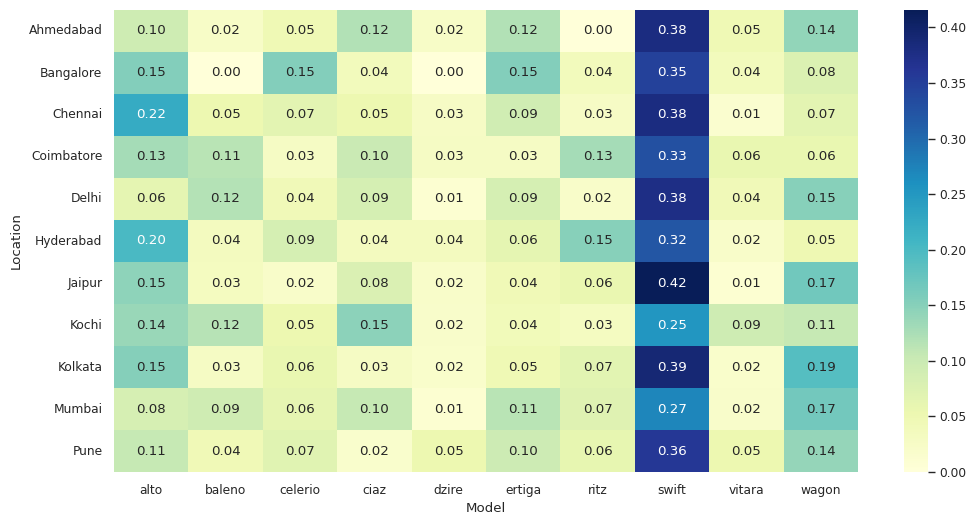

In [139]:
plt.figure(figsize = (12,6))
sn.heatmap(models_by_locations, annot =True, fmt ='0.2f', cmap ='YlGnBu')

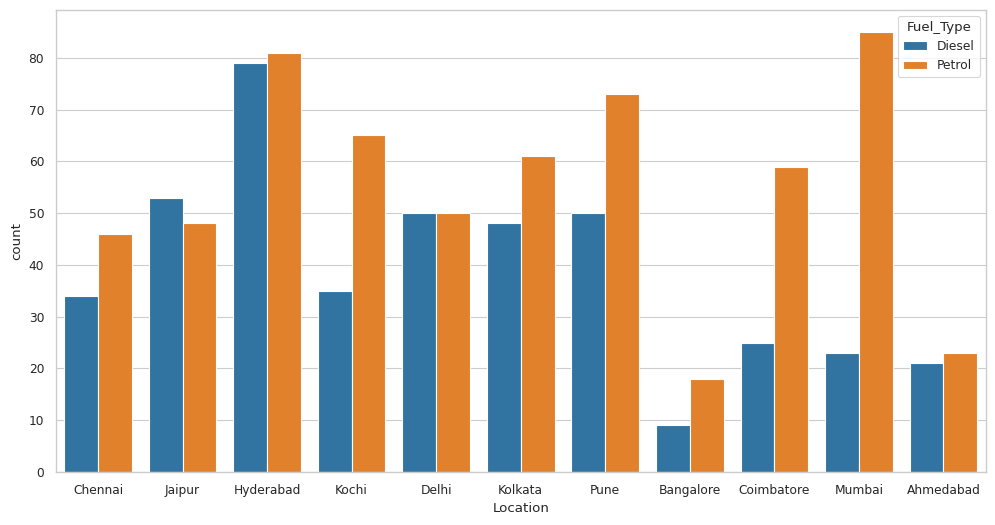

In [151]:
plt.figure(figsize=(12,6))
sn.countplot( data = cars_df,
             x = 'Location',
             hue = 'Fuel_Type');

### Ex8. Participants Exercise:

- Find out the demand for differnent fuel type of cars for different models?

In [142]:
top10_cars_df = cars_df[cars_df.Model.isin(top10_models)]
models_by_locations = pd.crosstab(cars_df.Model,
                                  top10_cars_df.Fuel_Type,
                                  normalize = 'index')
print(models_by_locations*100)

Fuel_Type      Diesel      Petrol
Model                            
alto         0.000000  100.000000
baleno      21.666667   78.333333
celerio      7.142857   92.857143
ciaz        56.060606   43.939394
dzire       75.000000   25.000000
ertiga      80.000000   20.000000
ritz        64.062500   35.937500
swift       64.417178   35.582822
vitara     100.000000    0.000000
wagon        0.000000  100.000000


<Axes: xlabel='Fuel_Type', ylabel='Model'>

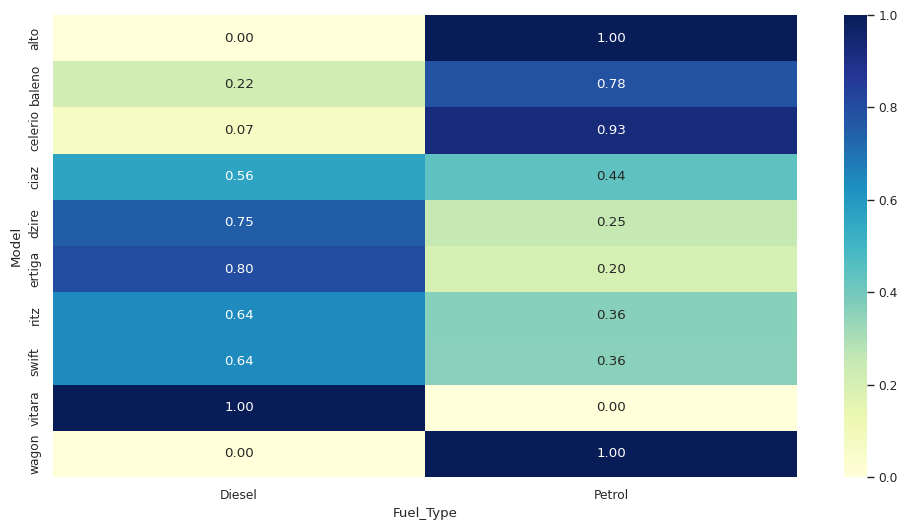

In [143]:
plt.figure(figsize = (12,6))
sn.heatmap(models_by_locations, annot =True, fmt ='0.2f', cmap ='YlGnBu')

<Axes: xlabel='Model', ylabel='count'>

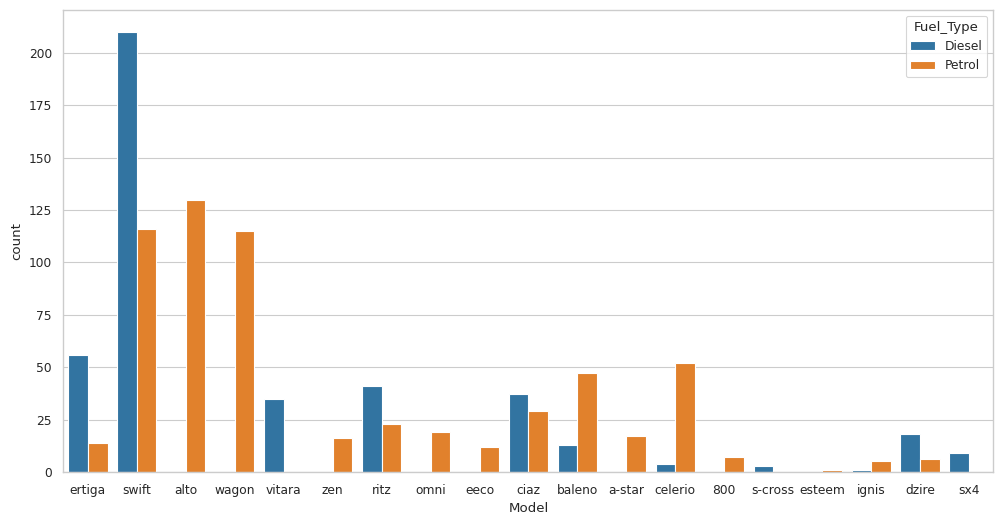

In [154]:
plt.figure(figsize = (12,6))
sn.countplot( data = cars_df,
             x = 'Model',
             hue = 'Fuel_Type')

## 14. How mileage is effecting the resale price?

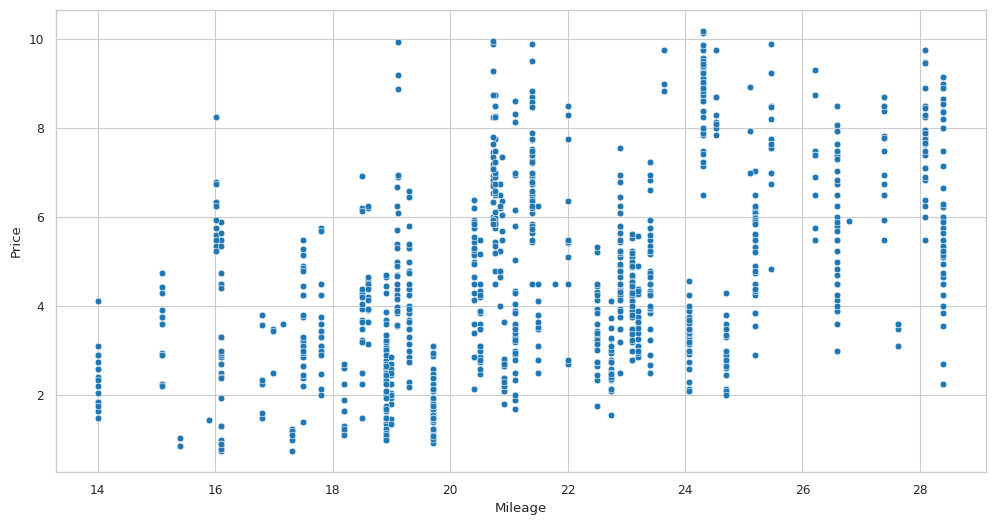

In [161]:
plt.figure(figsize = (12,6))
sn.scatterplot( data = cars_df,
               x = 'Mileage',
               y = 'Price');

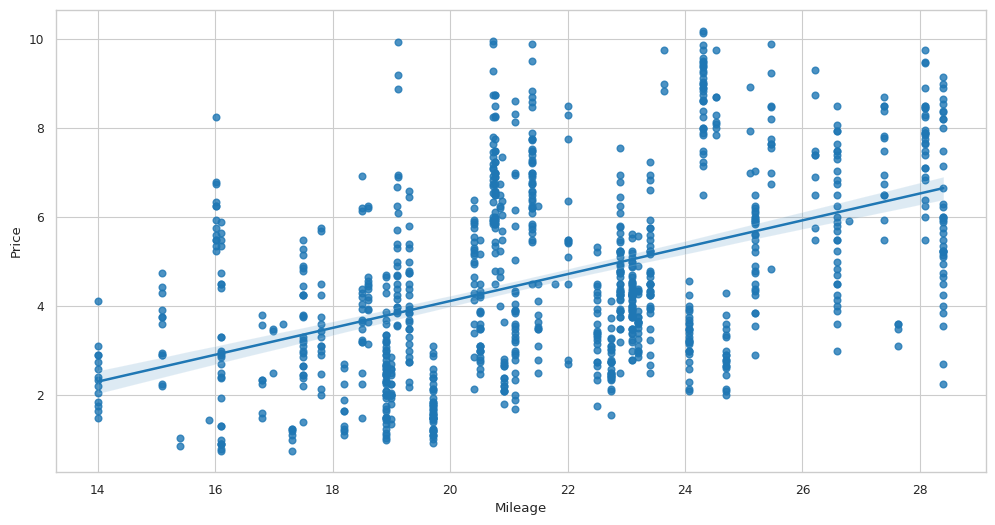

In [162]:
plt.figure(figsize = (12,6))
sn.regplot( data = cars_df,
               x = 'Mileage',
               y = 'Price');

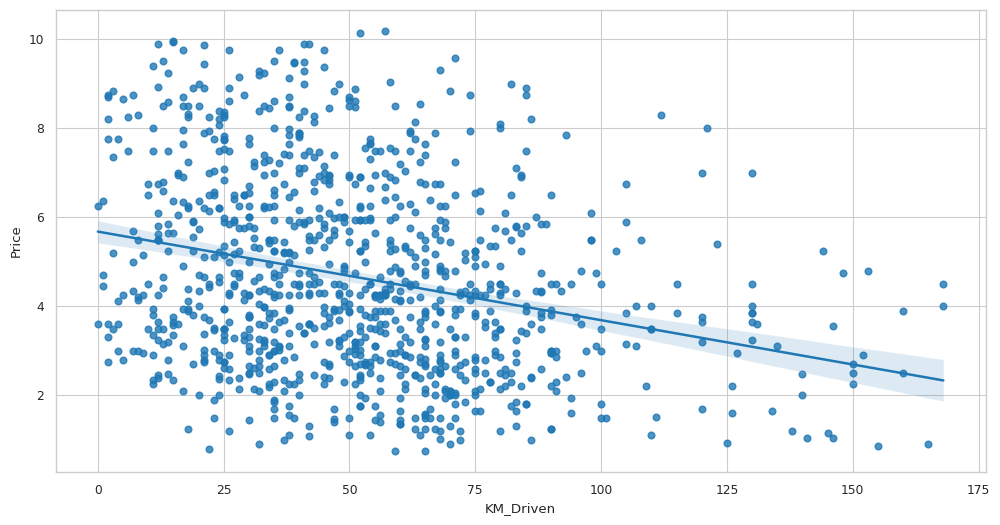

In [163]:
plt.figure(figsize = (12,6))
sn.regplot( data = cars_df,
               x = 'KM_Driven',
               y = 'Price');

## 15. How kilometer driven is effecting the resale price?

### Ex9. Participants Exercise:

- Find out the correlation between by drawing scatter plots
    - Power and Price
    - Age and Price

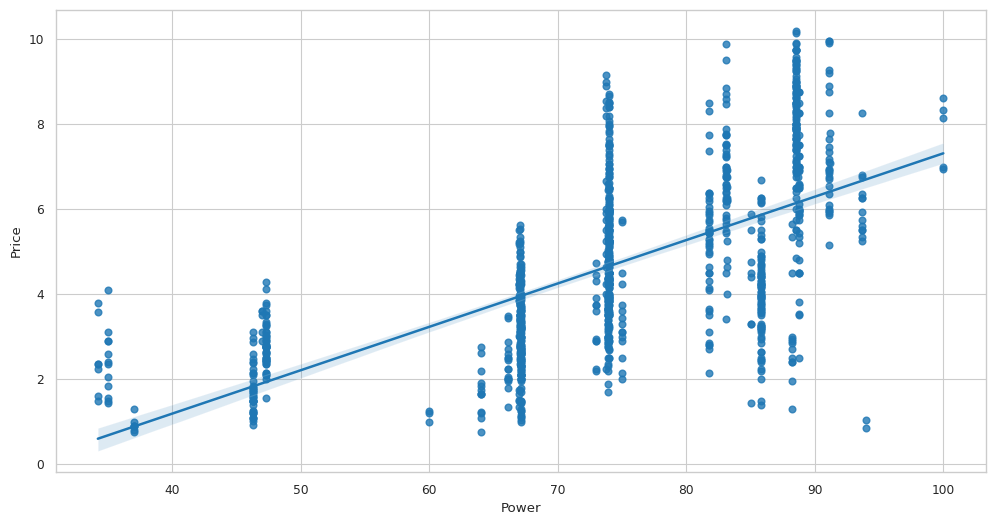

In [164]:
plt.figure(figsize = (12,6))
sn.regplot( data = cars_df,
               x = 'Power',
               y = 'Price');

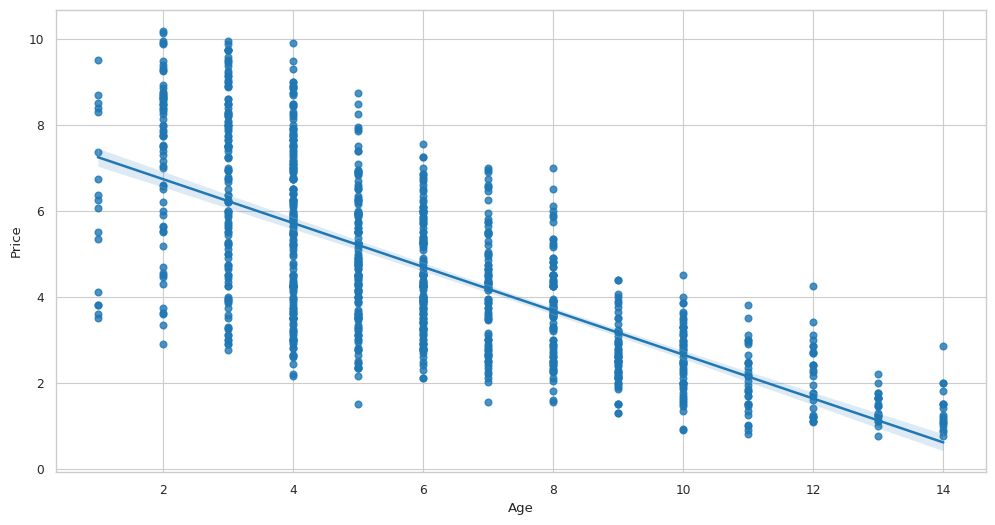

In [165]:
plt.figure(figsize = (12,6))
sn.regplot( data = cars_df,
               x = 'Age',
               y = 'Price');

## 16. Finding corrleation between multiple variables (numerical)

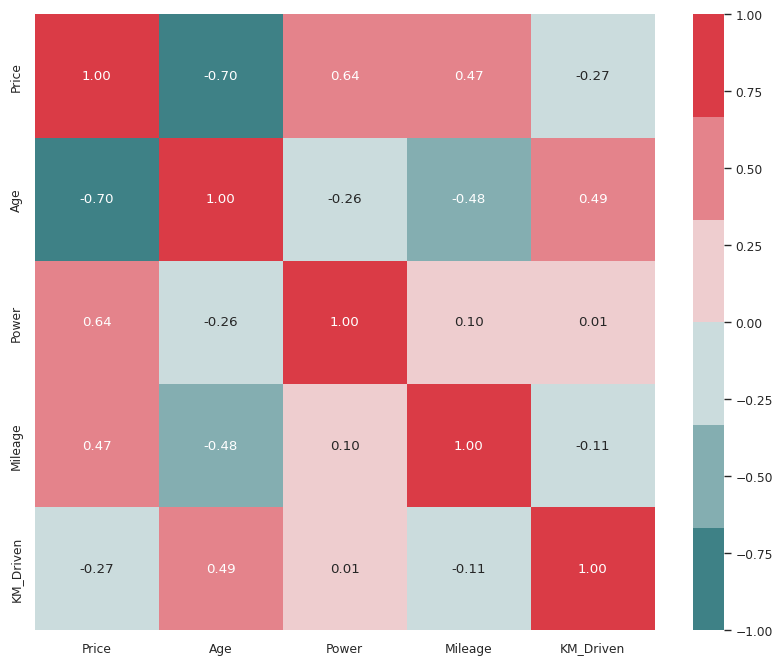

In [172]:
plt.figure(figsize = (10,8))
corr_mat = cars_df[['Price','Age','Power','Mileage','KM_Driven']].corr()
sn.heatmap(corr_mat,
           annot = True,
           fmt = '0.2f',
           vmin = -1.0,
           vmax = 1.0,
           cmap = sn.diverging_palette (200,10));

## 17. Save the DataFrame 

In [173]:
final_cars_df = cars_df[~cars_df.Model.isin(models_to_remove)]

In [174]:
final_cars_df.shape

(1010, 11)

In [175]:
final_cars_df.to_csv('final_cars_maruti.csv', index = False)

### Ex10. Participants Exercise:

- Save the dataframe in excel format.

# Rules for plotting

- Single Variable (Univariate Analysis)

    - Continuous -> Histogram, boxplot, distribution plot
    - Categorical -> Count Plot/Bar Plot

- Two Variables (Bivariate Analysis)

    - Continuous + Categorical -> Box plot, Overlapped Distribution Plot
    - Continuous + Continuous -> Scatter Plot, heatmap
    - Categoical + Categorical -> Bar Plot / Count Plot, heatmap